In [1]:
import os
import re
import mendeleev as mendel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pymatgen import MPRester
from dotenv import load_dotenv

In [2]:
load_dotenv('.env')
MATERIAL_API_KEY = os.getenv('MATERIAL_API_KEY')
mpr = MPRester(MATERIAL_API_KEY)

Connection established to Materials Project database, version 2020_09_08.


In [3]:
entries = mpr.query(criteria = {"elements":{"$in":["O"]}, 
                             "anonymous_formula":{"A":1, "B":1, "C":3},
                            # "crystal_system":'cubic', # "spacegroup.number":221, 
                             }, # "spacegroup.symbol":'Pm-3m'
                  properties = ['material_id', 'pretty_formula', 'formation_energy_per_atom', 'cif', 'structure'])

0 of 2515 done 0.0%
500 of 2515 done 19.9%
1000 of 2515 done 39.8%
1500 of 2515 done 59.6%
2000 of 2515 done 79.5%
2500 of 2515 done 99.4%
2515 of 2515 done 100.0%


In [4]:
for idx in range(len(entries)):
    formula = entries[idx]['pretty_formula']
    fE = entries[idx]['formation_energy_per_atom']
    
    print(idx," ",formula," %4.3f" % fE)

0   EuFeO3  -2.517
1   HfMgO3  -3.054
2   BaMnO3  -2.368
3   CaVO3  -2.838
4   MnCdO3  -1.434
5   HgRhO3  -0.592
6   CdSiO3  -2.181
7   CaGeO3  -2.591
8   MgZrO3  -2.852
9   BaVO3  -2.796
10   SrMnO3  -2.462
11   MgSiO3  -3.217
12   MgSiO3  -3.217
13   MgSiO3  -3.217
14   ZnSiO3  -2.555
15   IClO3  -0.051
16   NaOsO3  -1.631
17   RbOsO3  -1.529
18   NaMoO3  -2.096
19   VPbO3  -2.018
20   EuFeO3  -2.463
21   SmMnO3  -2.786
22   LaCuO3  -2.409
23   BaCoO3  -1.886
24   GaBO3  -2.539
25   ZnPbO3  -1.483
26   RbSeO3  -1.433
27   LaGaO3  -3.101
28   ErBO3  -3.514
29   LiIO3  -0.528
30   LaAlO3  -3.730
31   LaIO3  -2.270
32   LaScO3  -3.756
33   SmTiO3  -3.453
34   SmFeO3  -2.686
35   NaVO3  -2.246
36   CaCuO3  -1.707
37   YbBiO3  -2.386
38   TaOF3  -3.471
39   SbOF3  -2.317
40   SrNiO3  -1.696
41   VCuO3  -1.744
42   PbCO3  -1.817
43   PrCrO3  -2.937
44   MnGeO3  -2.137
45   MnVO3  -2.293
46   EuZrO3  -3.649
47   MnPbO3  -1.642
48   BaNiO3  -1.630
49   TiCuO3  -2.236
50   Yb3PbO  -1.839
51  

636   TlSiO3  -1.872
637   YbCuO3  -1.889
638   TmCrO3  -2.862
639   UBO3  -2.230
640   ZrBO3  -2.094
641   SmVO3  -3.161
642   CoBiO3  -1.429
643   SrTcO3  -2.462
644   CaMnO3  -2.415
645   CaTcO3  -2.468
646   MnInO3  -2.003
647   LuFeO3  -2.265
648   KAsO3  -1.941
649   MgSiO3  -3.211
650   HgNO3  -0.614
651   CdCO3  -1.190
652   SNO3  -0.460
653   KSiO3  -2.429
654   FeSiO3  -2.663
655   KIO3  -1.379
656   MnSeO3  -1.663
657   CaTiO3  -3.554
658   KPaO3  -3.572
659   La3AlO  -1.477
660   HoSbO3  -1.876
661   YbCeO3  -3.696
662   PuCrO3  -2.855
663   NiTeO3  -1.065
664   LiSeO3  -1.443
665   EuCoO3  -2.267
666   EuInO3  -2.629
667   ErScO3  -3.981
668   CeLuO3  -3.890
669   CeRhO3  -2.565
670   BaBO3  -1.583
671   KPO3  -2.454
672   CrFeO3  -1.342
673   AlCrO3  -2.543
674   AlCuO3  -1.982
675   AlFeO3  -2.032
676   MnAlO3  -2.549
677   SrTcO3  -2.463
678   CoNiO3  -1.077
679   LaCoO3  -2.643
680   LaMnO3  -2.986
681   LaMnO3  -2.893
682   CaFeO3  -2.250
683   LaMnO3  -2.965
684   Sr

1092   HfBeO3  -2.896
1093   HfBO3  -2.030
1094   InPtO3  -0.743
1095   InOsO3  -1.145
1096   HoSiO3  -2.796
1097   KAuO3  -0.564
1098   KHoO3  -2.323
1099   KCoO3  -0.963
1100   KMnO3  -1.494
1101   KRbO3  -0.344
1102   LaZnO3  -2.532
1103   LiAcO3  -2.417
1104   LiCrO3  -1.679
1105   LiFeO3  -1.355
1106   LiMgO3  -1.327
1107   LiPmO3  -2.308
1108   LiYbO3  -1.813
1109   CsAuO3  -0.462
1110   CsTbO3  -2.259
1111   CsTaO3  -2.790
1112   MgBeO3  -1.822
1113   MgHgO3  -0.974
1114   MgReO3  -1.743
1115   PmBeO3  -2.894
1116   PmEuO3  -2.851
1117   PuGaO3  -2.686
1118   PmWO3  -2.271
1119   SrTaO3  -3.290
1120   SrYbO3  -2.394
1121   SrZnO3  -1.881
1122   SrTmO3  -3.131
1123   PuMgO3  -2.778
1124   PuSbO3  -2.127
1125   SbAuO3  -0.907
1126   SbPdO3  -0.922
1127   TaAgO3  -2.405
1128   SrPdO3  -1.688
1129   SrPtO3  -1.710
1130   TbErO3  -3.204
1131   TbMgO3  -2.774
1132   TbOsO3  -1.890
1133   TbVO3  -2.898
1134   TcSnO3  -1.511
1135   YbSnO3  -2.603
1136   TlGeO3  -1.379
1137   VCoO3  -1.5

1580   CeMnO3  -2.805
1581   CoMoO3  -1.175
1582   EuErO3  -3.149
1583   CsLaO3  -2.221
1584   CsPrO3  -2.136
1585   CsSrO3  -1.394
1586   CsTiO3  -2.371
1587   GaNiO3  -0.583
1588   CuHgO3  -0.356
1589   CuPbO3  -0.927
1590   GaTeO3  -1.203
1591   EuBeO3  -2.440
1592   EuTmO3  -3.193
1593   EuPdO3  -1.800
1594   EuAuO3  -1.481
1595   EuIrO3  -1.902
1596   GdBeO3  -2.883
1597   GeBiO3  -1.457
1598   GdZrO3  -3.289
1599   InAsO3  -1.208
1600   KAlO3  -2.070
1601   KTmO3  -2.365
1602   KZrO3  -2.808
1603   KYbO3  -1.623
1604   KDyO3  -2.305
1605   LiTmO3  -2.177
1606   LiNiO3  -0.639
1607   LiDyO3  -2.211
1608   LiErO3  -2.187
1609   LiPrO3  -2.250
1610   LuGaO3  -2.762
1611   LuPdO3  -1.764
1612   LuGeO3  -2.271
1613   LuReO3  -1.951
1614   CsEuO3  -1.978
1615   MgTlO3  -1.214
1616   MgBO3  -1.715
1617   MgAlO3  -2.553
1618   MgBiO3  -1.659
1619   MnBO3  -1.355
1620   NpAlO3  -3.300
1621   NiPtO3  0.451
1622   NiSbO3  -0.891
1623   NaCaO3  -1.336
1624   NaGeO3  -1.711
1625   NaPbO3  -1.

2093   KLiO3  -0.763
2094   KTeO3  -1.652
2095   KLuO3  -2.393
2096   KSrO3  -1.341
2097   LaMgO3  -2.959
2098   KGdO3  -2.329
2099   KOsO3  -1.639
2100   LaZrO3  -3.434
2101   LaSnO3  -2.453
2102   LaCoO3  -2.614
2103   LiBO3  -1.248
2104   LiGeO3  -1.678
2105   LiAlO3  -2.091
2106   LiEuO3  -1.998
2107   LiNdO3  -2.248
2108   LiGdO3  -2.271
2109   LiSiO3  -2.403
2110   LuNpO3  -3.116
2111   CsTlO3  -0.769
2112   CsSbO3  -1.625
2113   MgUO3  -2.858
2114   MgInO3  -1.430
2115   NaCoO3  -0.945
2116   NaFeO3  -1.403
2117   NaInO3  -1.190
2118   NaSiO3  -2.369
2119   NaZnO3  -0.864
2120   NbFeO3  -2.016
2121   NdTaO3  -2.986
2122   NpRuO3  -1.870
2123   PaHgO3  -2.813
2124   PaSiO3  -2.407
2125   PaTaO3  -2.631
2126   SrWO3  -2.448
2127   RbMgO3  -1.408
2128   SrAuO3  -1.430
2129   TbTeO3  -1.620
2130   ThBO3  -2.399
2131   YbWO3  -2.443
2132   ThCuO3  -2.477
2133   ThReO3  -2.101
2134   YbGaO3  -2.479
2135   YbCrO3  -2.675
2136   YbNbO3  -3.181
2137   UPdO3  -2.459
2138   UTiO3  -2.929
2

In [5]:
# querable_values = ['atomic_number','atomic_weight','electrons','boiling_point','melting_point']
columns = ['mp_id','formula','fE_MP','A','B','O',
          'A_an','A_aw','A_e','A_bp','A_mp','A_dp','A_en',
          'B_an','B_aw','B_e','B_bp','B_mp','B_dp','B_en'
       #   'O_an','O_aw','O_e','O_bp','O_mp'
          ]
df_entries = pd.DataFrame(data = np.zeros((len(entries),len(columns))), columns = columns)
df_entries

,mp_id,formula,fE_MP,A,B,O,A_an,A_aw,A_e,A_bp,A_mp,A_dp,A_en,B_an,B_aw,B_e,B_bp,B_mp,B_dp,B_en
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
element_list = []

for idx in range(len(entries)):
    df_entries['mp_id'][idx] = entries[idx]['material_id']
    df_entries['formula'][idx] = entries[idx]['pretty_formula']
    df_entries['fE_MP'][idx] = entries[idx]['formation_energy_per_atom']
    
    # df_entries['A'][idx] = entries[idx]['structure'].composition.elements[0]
    # df_entries['B'][idx] = entries[idx]['structure'].composition.elements[1]
    # df_entries['C'][idx] = entries[idx]['structure'].composition.elements[2]                  
   # element_list = list(set(entries[idx]['structure'].species))
    
    x = re.findall('([A-Z][a-z]?)([0-9]*)',entries[idx]['pretty_formula'])
    elements = []
    for element, count in x:
        if count != 3:
            elements.append(element)
        if element not in element_list:
            element_list.append(element)
                        
    df_entries['A'][idx] = elements[0]
    df_entries['B'][idx] = elements[1]
    df_entries['O'][idx] = 'O'
                     
df_entries

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\

,mp_id,formula,fE_MP,A,B,O,A_an,A_aw,A_e,A_bp,A_mp,A_dp,A_en,B_an,B_aw,B_e,B_bp,B_mp,B_dp,B_en
0,mp-1011260,EuFeO3,-2.517135,Eu,Fe,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-1016825,HfMgO3,-3.053599,Hf,Mg,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-1016852,BaMnO3,-2.368006,Ba,Mn,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mp-1016853,CaVO3,-2.838377,Ca,V,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mp-1016854,MnCdO3,-1.434181,Mn,Cd,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,mp-572987,NiSeO3,-1.122981,Ni,Se,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2511,mp-649676,CaSiO3,-3.108477,Ca,Si,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2512,mp-752746,CdCoO3,-1.080919,Cd,Co,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2513,mp-976848,NiRuO3,0.160063,Ni,Ru,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
len(element_list)

84

In [8]:
mendel.element('Fe')

Element(
	abundance_crust=56300.0,
 	abundance_sea=0.002,
 	annotation='',
 	atomic_number=26,
 	atomic_radius=140.0,
 	atomic_radius_rahm=237.0,
 	atomic_volume=7.1,
 	atomic_weight=55.845,
 	atomic_weight_uncertainty=0.002,
 	block='d',
 	boiling_point=3023.0,
 	c6=482.0,
 	c6_gb=548.0,
 	cas='7439-89-6',
 	covalent_radius_bragg=140.0,
 	covalent_radius_cordero=142.0,
 	covalent_radius_pyykko=115.99999999999999,
 	covalent_radius_pyykko_double=109.0,
 	covalent_radius_pyykko_triple=102.0,
 	cpk_color='#ffa500',
 	density=7.874,
 	description="Silvery malleable and ductile metallic transition element. Has nine isotopes and is the fourth most abundant element in the earth's crust. Required by living organisms as a trace element (used in hemoglobin in humans.) Quite reactive, oxidizes in moist air, displaces hydrogen from dilute acids and combines with nonmetallic elements.",
 	dipole_polarizability=62.0,
 	dipole_polarizability_unc=4.0,
 	discoverers='Known to the ancients.',
 	discove

In [9]:
querable_values = ['atomic_number','atomic_weight','electrons','boiling_point','melting_point','dipole_polarizability','en_ghosh']
# 'heat_of_formation','en_pauling'

In [10]:
all_values = []
for element in element_list:
    element_values = []
    element_obj = mendel.element(element)
    
    for i in querable_values:
        element_values.append(getattr(element_obj,i))
    
    all_values.append(element_values)


In [11]:
df = pd.DataFrame(all_values, columns = querable_values)
df

,atomic_number,atomic_weight,electrons,boiling_point,melting_point,dipole_polarizability,en_ghosh
0,63,151.964000,63,1870.000,1095.00,184.0,0.189935
1,26,55.845000,26,3023.000,1808.00,62.0,0.139253
2,8,15.999000,8,90.190,54.80,5.3,0.304575
3,72,178.490000,72,5470.000,2503.00,103.0,0.229987
4,12,24.305000,12,1363.000,922.00,71.2,0.121644
...,...,...,...,...,...,...,...
79,79,196.966569,79,3080.000,1337.58,36.0,0.261370
80,16,32.060000,16,717.824,386.00,19.4,0.235960
81,77,192.217000,77,4403.000,2683.00,54.0,0.251060
82,43,97.907210,43,5150.000,2445.00,79.0,0.134459


In [12]:
prop = 'en_ghosh'
for val in df[prop].values:
    if type(val) != float:
        print(val)

0.189935
0.13925320000000002
0.304575
0.229987
0.121644
0.1586786
0.1352844
0.1154119
0.12733440000000001
0.1504066
0.16899999999999998
0.1408379
0.178503
0.1895892
0.12488869999999999
0.1185082
0.15515179999999998
0.21951759999999998
0.263803
0.093214
0.24798449999999997
0.10468599999999999
0.1312672
0.17791099999999999
0.185468
0.163142
0.15117160000000002
0.14323629999999998
0.17237729999999998
0.184886
0.2240328
0.212261
0.105093
0.150078
0.11938330000000001
0.12336369999999999
0.22119
0.182377
0.23458099999999998
0.344443
0.19187739999999998
0.1472068
0.22477600000000003
0.17207999999999998
0.13130529999999999
0.20569920000000003
0.178052
0.1472165
0.2068208
0.26493
0.0981896
0.10032999999999999
0.144986
0.16423
0.20332999999999998
0.12149000000000001
0.1440276
0.1944
0.20779499999999998
0.14265
0.1216986
0.25690999999999997
0.1376494
0.1280782
0.1810032
0.16137
0.198863
0.10277
0.173447
0.2167244
0.2390504
0.13207
0.176539
0.1542125
0.16760999999999998
0.22565
0.2412578
0.206931


In [13]:
element_obj = mendel.element(df_entries['A'][0])
getattr(element_obj,'atomic_number')

63

In [15]:
for idx in range(len(df_entries)):
    A_site_obj = mendel.element(df_entries['A'][idx])
    df_entries['A_an'][idx] = getattr(A_site_obj,'atomic_number')
    df_entries['A_aw'][idx] = getattr(A_site_obj,'atomic_weight')
    df_entries['A_e'][idx] = getattr(A_site_obj,'electrons')
    df_entries['A_bp'][idx] = getattr(A_site_obj,'boiling_point')
    df_entries['A_mp'][idx] = getattr(A_site_obj,'melting_point')
    df_entries['A_dp'][idx] = getattr(A_site_obj,'dipole_polarizability')
    df_entries['A_en'][idx] = getattr(A_site_obj,'en_ghosh')
    
    B_site_obj = mendel.element(df_entries['B'][idx])
    df_entries['B_an'][idx] = getattr(B_site_obj,'atomic_number')
    df_entries['B_aw'][idx] = getattr(B_site_obj,'atomic_weight')
    df_entries['B_e'][idx] = getattr(B_site_obj,'electrons')
    df_entries['B_bp'][idx] = getattr(B_site_obj,'boiling_point')
    df_entries['B_mp'][idx] = getattr(B_site_obj,'melting_point')
    df_entries['B_dp'][idx] = getattr(B_site_obj,'dipole_polarizability')
    df_entries['B_en'][idx] = getattr(B_site_obj,'en_ghosh')
    
#del df_entries['O_an']    
#del df_entries['O_aw']    
#del df_entries['O_e']    
#del df_entries['O_bp']    
#del df_entries['O_mp']    
# df_entries

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [16]:
df_entries

,mp_id,formula,fE_MP,A,B,O,A_an,A_aw,A_e,A_bp,A_mp,A_dp,A_en,B_an,B_aw,B_e,B_bp,B_mp,B_dp,B_en
0,mp-1011260,EuFeO3,-2.517135,Eu,Fe,O,63.0,151.964000,63.0,1870.0,1095.0,184.0,0.189935,26.0,55.845000,26.0,3023.0,1808.0,62.0,0.139253
1,mp-1016825,HfMgO3,-3.053599,Hf,Mg,O,72.0,178.490000,72.0,5470.0,2503.0,103.0,0.229987,12.0,24.305000,12.0,1363.0,922.0,71.2,0.121644
2,mp-1016852,BaMnO3,-2.368006,Ba,Mn,O,56.0,137.327000,56.0,1910.0,1002.0,272.0,0.158679,25.0,54.938044,25.0,2235.0,1517.0,68.0,0.135284
3,mp-1016853,CaVO3,-2.838377,Ca,V,O,20.0,40.078000,20.0,1757.0,1112.0,160.8,0.115412,23.0,50.941500,23.0,3650.0,2160.0,87.0,0.127334
4,mp-1016854,MnCdO3,-1.434181,Mn,Cd,O,25.0,54.938044,25.0,2235.0,1517.0,68.0,0.135284,48.0,112.414000,48.0,1038.0,594.1,46.0,0.150407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,mp-572987,NiSeO3,-1.122981,Ni,Se,O,28.0,58.693400,28.0,3005.0,1726.0,49.0,0.147207,34.0,78.971000,34.0,958.1,490.0,28.9,0.224033
2511,mp-649676,CaSiO3,-3.108477,Ca,Si,O,20.0,40.078000,20.0,1757.0,1112.0,160.8,0.115412,14.0,28.085000,14.0,2628.0,1683.0,37.3,0.178503
2512,mp-752746,CdCoO3,-1.080919,Cd,Co,O,48.0,112.414000,48.0,1038.0,594.1,46.0,0.150407,27.0,58.933194,27.0,3143.0,1768.0,55.0,0.143236
2513,mp-976848,NiRuO3,0.160063,Ni,Ru,O,28.0,58.693400,28.0,3005.0,1726.0,49.0,0.147207,44.0,101.070000,44.0,4173.0,2583.0,72.0,0.137649


In [18]:
columns = ['A_an','A_aw','A_e','A_bp','A_mp','A_dp','A_en','B_an','B_aw','B_e','B_bp','B_mp','B_dp','B_en']

# df_values = pd.DataFrame(data = , columns = columns)

df_entries.values

array([['mp-1011260', 'EuFeO3', -2.5171352157499998, ..., 1808.0, 62.0,
        0.13925320000000002],
       ['mp-1016825', 'HfMgO3', -3.053598819416666, ..., 922.0, 71.2,
        0.121644],
       ['mp-1016852', 'BaMnO3', -2.3680057728730346, ..., 1517.0, 68.0,
        0.1352844],
       ...,
       ['mp-752746', 'CdCoO3', -1.0809190442499996, ..., 1768.0, 55.0,
        0.14323629999999998],
       ['mp-976848', 'NiRuO3', 0.16006337124999917, ..., 2583.0, 72.0,
        0.1376494],
       ['mvc-3464', 'YSnO3', -2.8164700390833324, ..., 505.1, 53.0,
        0.178052]], dtype=object)

In [19]:
all_values = []
for col in columns:
    all_values.append(df_entries[col].values)
np.array(all_values).transpose()

array([[6.300000e+01, 1.519640e+02, 6.300000e+01, ..., 1.808000e+03,
        6.200000e+01, 1.392532e-01],
       [7.200000e+01, 1.784900e+02, 7.200000e+01, ..., 9.220000e+02,
        7.120000e+01, 1.216440e-01],
       [5.600000e+01, 1.373270e+02, 5.600000e+01, ..., 1.517000e+03,
        6.800000e+01, 1.352844e-01],
       ...,
       [4.800000e+01, 1.124140e+02, 4.800000e+01, ..., 1.768000e+03,
        5.500000e+01, 1.432363e-01],
       [2.800000e+01, 5.869340e+01, 2.800000e+01, ..., 2.583000e+03,
        7.200000e+01, 1.376494e-01],
       [3.900000e+01, 8.890584e+01, 3.900000e+01, ..., 5.051000e+02,
        5.300000e+01, 1.780520e-01]])

In [20]:
df_entries.values.shape

(2515, 20)

In [21]:
df_values = pd.DataFrame(data = np.array(all_values).transpose(), columns = columns)
df_values

,A_an,A_aw,A_e,A_bp,A_mp,A_dp,A_en,B_an,B_aw,B_e,B_bp,B_mp,B_dp,B_en
0,63.0,151.964000,63.0,1870.0,1095.0,184.0,0.189935,26.0,55.845000,26.0,3023.0,1808.0,62.0,0.139253
1,72.0,178.490000,72.0,5470.0,2503.0,103.0,0.229987,12.0,24.305000,12.0,1363.0,922.0,71.2,0.121644
2,56.0,137.327000,56.0,1910.0,1002.0,272.0,0.158679,25.0,54.938044,25.0,2235.0,1517.0,68.0,0.135284
3,20.0,40.078000,20.0,1757.0,1112.0,160.8,0.115412,23.0,50.941500,23.0,3650.0,2160.0,87.0,0.127334
4,25.0,54.938044,25.0,2235.0,1517.0,68.0,0.135284,48.0,112.414000,48.0,1038.0,594.1,46.0,0.150407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,28.0,58.693400,28.0,3005.0,1726.0,49.0,0.147207,34.0,78.971000,34.0,958.1,490.0,28.9,0.224033
2511,20.0,40.078000,20.0,1757.0,1112.0,160.8,0.115412,14.0,28.085000,14.0,2628.0,1683.0,37.3,0.178503
2512,48.0,112.414000,48.0,1038.0,594.1,46.0,0.150407,27.0,58.933194,27.0,3143.0,1768.0,55.0,0.143236
2513,28.0,58.693400,28.0,3005.0,1726.0,49.0,0.147207,44.0,101.070000,44.0,4173.0,2583.0,72.0,0.137649


In [22]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [23]:
sdscaler.fit(np.array(all_values).transpose())
sdscaled_data = sdscaler.transform(np.array(all_values).transpose())
sdscaled_data = pd.DataFrame(sdscaled_data, columns = columns)
sdscaled_data

,A_an,A_aw,A_e,A_bp,A_mp,A_dp,A_en,B_an,B_aw,B_e,B_bp,B_mp,B_dp,B_en
0,0.989995,0.955223,0.989995,-0.442345,-0.135643,0.353350,1.099894,-0.496820,-0.539494,-0.496820,0.187436,0.368179,0.049559,-0.862283
1,1.382198,1.402973,1.382198,2.683458,2.119316,-0.576436,2.155331,-1.065218,-1.034251,-1.065218,-0.997928,-0.579854,0.276651,-1.259054
2,0.684948,0.708155,0.684948,-0.407614,-0.284585,1.363488,0.276235,-0.537420,-0.553721,-0.537420,-0.375255,0.056805,0.197662,-0.951708
3,-0.883865,-0.933377,-0.883865,-0.540461,-0.108417,0.087041,-0.863916,-0.618619,-0.616413,-0.618619,0.635161,0.744824,0.666657,-1.130838
4,-0.665974,-0.682544,-0.665974,-0.125424,0.540204,-0.978195,-0.340242,0.396377,0.347885,0.396377,-1.230002,-0.930711,-0.345384,-0.610974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.535240,-0.619155,-0.535240,0.543151,0.874925,-1.196293,-0.026066,-0.172021,-0.176724,-0.172021,-1.287057,-1.042100,-0.767479,1.047976
2511,-0.883865,-0.933377,-0.883865,-0.540461,-0.108417,0.087041,-0.863916,-0.984018,-0.974956,-0.984018,-0.094624,0.234427,-0.560134,0.022096
2512,0.336323,0.287632,0.336323,-1.164753,-0.937851,-1.230730,0.058254,-0.456220,-0.491050,-0.456220,0.273125,0.325378,-0.123229,-0.772535
2513,-0.535240,-0.619155,-0.535240,0.543151,0.874925,-1.196293,-0.026066,0.233978,0.169936,0.233978,1.008622,1.197440,0.296398,-0.898420


In [24]:
label = df_entries['fE_MP']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sdscaled_data, label, test_size = 0.2, random_state = 2020)

# random_state에 대한 시드값 임의로 고정해두기.

### 1. Support Vector Machine Regressor

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svm_regr = SVR()

In [28]:
svm_regr = SVR(kernel = 'poly', C = 20)
svm_regr.fit(x_train,y_train)
y_pred = svm_regr.predict(x_test)
print('SVM Regression,  R2 : {:.4f}'.format(r2_score(y_test,y_pred)))

SVM Regression,  R2 : 0.6622


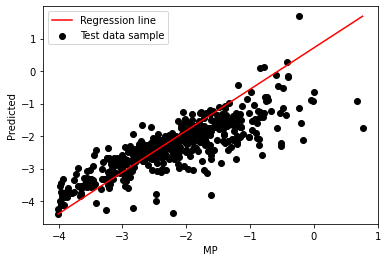

In [29]:
line_x = np.linspace(np.min(y_test), np.max(y_test), 100)
line_y = np.linspace(np.min(y_pred), np.max(y_pred), 100)

plt.scatter(y_test, y_pred, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.xlabel('MP')
plt.ylabel('Predicted')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

### 2. Multiple Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
mul_lr = LinearRegression()
mul_lr.fit(x_train, y_train)
y_pred = mul_lr.predict(x_test)
print('Multiple Linear Regression, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

Multiple Linear Regression, R2 : 0.3694


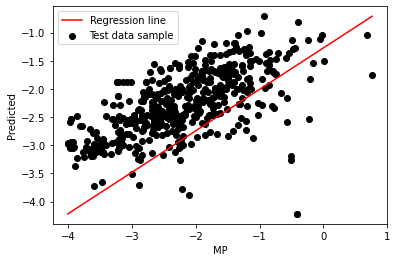

In [31]:
line_x = np.linspace(np.min(y_test), np.max(y_test), 100)
line_y = np.linspace(np.min(y_pred), np.max(y_pred), 100)

plt.scatter(y_test, y_pred, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.xlabel('MP')
plt.ylabel('Predicted')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

### 3. Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 10)
dt_regr.fit(x_train, y_train)
y_pred = dt_regr.predict(x_test)
print('Decision Tree Regression, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

Decision Tree Regression, R2 : 0.8022


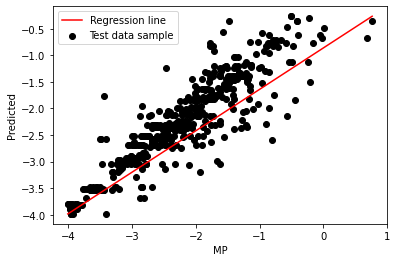

In [33]:
line_x = np.linspace(np.min(y_test), np.max(y_test), 100)
line_y = np.linspace(np.min(y_pred), np.max(y_pred), 100)

plt.scatter(y_test, y_pred, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.xlabel('MP')
plt.ylabel('Predicted')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

### 4. Multi Layer Perceptron Regressor

In [34]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor()

In [35]:
mlp_regr = MLPRegressor(hidden_layer_sizes = (10,10), activation = 'tanh', 
                       solver = 'sgd', random_state = 2020)
mlp_regr.fit(x_train, y_train)
y_pred = mlp_regr.predict(x_test)
print('Multi-layer Perception Regression, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))
mlp_regr.score(x_test,y_test)

Multi-layer Perception Regression, R2 : 0.6246


C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6246048643643052

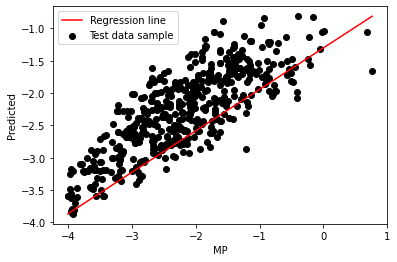

In [36]:
line_x = np.linspace(np.min(y_test), np.max(y_test), 100)
line_y = np.linspace(np.min(y_pred), np.max(y_pred), 100)

plt.scatter(y_test, y_pred, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.xlabel('MP')
plt.ylabel('Predicted')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

In [37]:
mlp_regr = MLPRegressor(hidden_layer_sizes = (500,500,100), activation = 'relu', 
                       solver = 'adam', random_state = 2020)
mlp_regr.fit(x_train, y_train)
y_pred = mlp_regr.predict(x_test)
print('Multi-layer Perception Regression, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))
mlp_regr.score(x_test,y_test)

Multi-layer Perception Regression, R2 : 0.8251


0.825141673820495

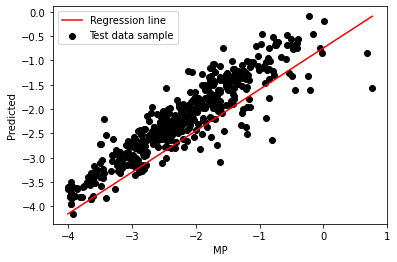

In [38]:
line_x = np.linspace(np.min(y_test), np.max(y_test), 100)
line_y = np.linspace(np.min(y_pred), np.max(y_pred), 100)

plt.scatter(y_test, y_pred, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.xlabel('MP')
plt.ylabel('Predicted')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

### 5. Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Random Forest Regression, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))
rf.score(x_test,y_test)

Random Forest Regression, R2 : 0.8405


0.840523509532189

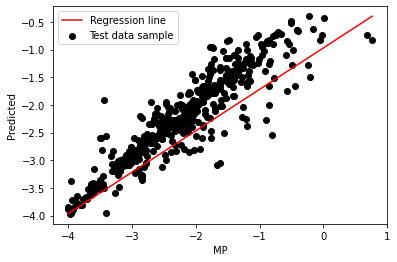

In [42]:
line_x = np.linspace(np.min(y_test), np.max(y_test), 100)
line_y = np.linspace(np.min(y_pred), np.max(y_pred), 100)

plt.scatter(y_test, y_pred, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.xlabel('MP')
plt.ylabel('Predicted')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')